In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.externals import joblib

sns.set()

In [30]:
data = pd.read_csv("output\\4trainingdata.csv")

In [31]:
data.shape

(786, 7)

In [32]:
data["home_win"].describe()

count    786.000000
mean       0.567430
std        0.495748
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: home_win, dtype: float64

In [33]:
data[data["home_pct"] == data["away_pct"]]["home_win"].describe()

count    189.000000
mean       0.555556
std        0.498224
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: home_win, dtype: float64

In [34]:
data[data["away_pct"] == 0]["home_win"].mean()

0.7391304347826086

In [8]:
data[data["home_pct"] > data["away_pct"]]["home_win"].describe()

count    282.000000
mean       0.744681
std        0.436816
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: home_win, dtype: float64

In [11]:
data[data["away_pct"] > data["home_pct"]]["home_win"].describe()

count    319.000000
mean       0.423197
std        0.494842
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: home_win, dtype: float64

In [12]:
y = data.home_win

In [16]:
X = data.drop(["home_win", "home", "away"], axis=1, inplace=False)

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

def get_model_and_grid():

    #model = MLPClassifier()
    #param_grid = {    
    #}
    
    model = GaussianNB()
    param_grid = {
    }
    
    #model = DecisionTreeClassifier()

    #model = AdaBoostClassifier()
    #param_grid = {
    #    "learning_rate": [0.01, 0.1, 0.5, 1, 10],
    #    "n_estimators": [1, 10, 50, 100]
    #}

    #print("getting model")
    #
    #model = SVC()
    #
    #param_grid = {
    #    "C": [0.01, 0.1, 1, 10, 100],
    #    "kernel": ['linear', 'rbf']
    # }

    return model, param_grid

In [18]:
from sklearn.model_selection import GridSearchCV

model, param_grid = get_model_and_grid()

grid = GridSearchCV(model, param_grid, cv=5, return_train_score=True)

grid.fit(X, y)

print(grid.best_score_)

model = grid.best_estimator_

y_model = model.predict(X)

confidence = model.predict_proba(X)

0.634980988593


In [22]:
def confidence_stats(interval):
    
    correct_count = 0
    total_count = 0
    
    for i,v in enumerate(y_model):
        if np.max(confidence[i]) >= interval:
            total_count += 1
            if y[i] == y_model[i]:
                correct_count += 1
    
    return correct_count, total_count, interval

def render_confidence(stats):
    if stats[1] == 0:
        print(stats[2], " confidence no correct preds found")
    else:
        print(stats[2], stats[0], stats[1], stats[0]/stats[1])

In [23]:
at_80 = render_confidence(confidence_stats(0.8))

at_90 = render_confidence(confidence_stats(0.9))

at_95 = render_confidence(confidence_stats(0.95))

0.8 28 35 0.8
0.9  confidence no correct preds found
0.95  confidence no correct preds found


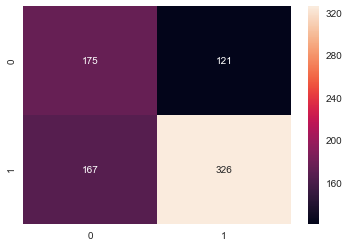

In [24]:
#sns.pairplot(data, hue='home_win')

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_true=y, y_pred=y_model)

sns.heatmap(mat.T, annot=True, fmt='d')

In [35]:
data.head()

,away,home,away_pct,home_pct,away_pts,home_pts,home_win
0,Minnesota Vikings,Green Bay Packers,0.50,0.50,22.75,23.00,1
1,Cleveland Browns,Tennessee Titans,0.25,0.25,18.50,15.00,0
2,Pittsburgh Steelers,Jacksonville Jaguars,0.50,0.00,24.25,14.50,0
3,St. Louis Rams,Philadelphia Eagles,0.25,0.75,14.00,30.50,1
4,Buffalo Bills,Detroit Lions,0.50,0.75,19.75,21.25,0


In [27]:
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def evaluate(weeks_to_roll):
    data = pd.read_csv(f"output\\{weeks_to_roll}trainingdata.csv")
    
    y = data.home_win
    X = data.drop(["home_win", "home", "away"], axis=1, inplace=False)
    
    model = joblib.load(f"models\\{weeks_to_roll}_model.pkl")
    
    y_predicted = model.predict(X)
    
    accuracy = accuracy_score(y, y_predicted)
    f1 = f1_score(y, y_predicted)
    
    print(f"{weeks_to_roll} accuracy: {accuracy}")
    print(f"{weeks_to_roll} f1: {f1}" )
    
    with open(f"summary_{weeks_to_roll}.csv", 'w') as f:
        for i,v in enumerate(y):
            f.write(f"{y[i]},{y_predicted[i]}\n")

In [29]:
weeks = np.arange(2,7)

for w in weeks:
    evaluate(w)

2 accuracy: 0.5790031813361611
2 f1: 0.6900858704137393
3 accuracy: 0.6095017381228274
3 f1: 0.6916742909423604
4 accuracy: 0.6349809885931559
4 f1: 0.6936170212765957
5 accuracy: 0.6387726638772664
5 f1: 0.7012687427912341
6 accuracy: 0.644916540212443
6 f1: 0.7200956937799042


In [ ]:
weeks = np.arange